In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype
# import seaborn as sns
%matplotlib inline
# plt.style.use('ggplot')
# sns.set_context('talk')
from matplotlib import colors as mcolors
from pylab import *

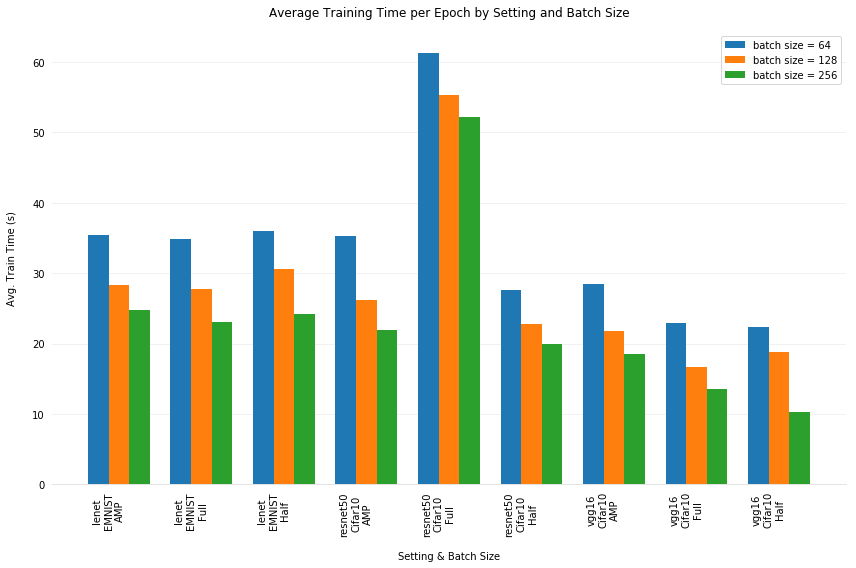

In [1]:
files = [
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize1024_AMP',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize1024_Full',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize1024_Half',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_AMP',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_Full',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_Half',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_AMP',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_Full',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_Half',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_AMP',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_Full',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_Half',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_AMP',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_Full',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_AMP',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Full',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_AMP',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_Full',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize512_AMP',
#	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize512_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_AMP',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_Full',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_Half',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize1024_AMP',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize1024_Full',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize1024_Half',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_AMP',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_Full',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_Half',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_AMP',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_Full',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_Half',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_AMP',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_Full',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_Half',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_AMP',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_Full',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_Half'
]

data = []
data.append(['model', 'dataset', 'batch_size', 'precision', 'avg_epoch_train_time'])
for file in files:
  tmp = file.replace('output/v100_fullmodel/results_' ,'')
  tmp = tmp.split('_')
  model = tmp[0]
  dataset = tmp[1]
  batch_size = tmp[2].replace('batchsize','')
  precision = tmp[3]
  df=pd.read_csv(file, sep=',',header=0)
  df = df.iloc[1:] # delete the first (re-training) row (epoch 0)
  avg_train_time = df['epoch_train_time'].mean()
  data.append([model, dataset, batch_size, precision, avg_train_time])

df = pd.DataFrame(data[1:],columns=data[0])
df['settng'] = df.model + "\n" + df.dataset + "\n" + df.precision
df = df[['settng', 'batch_size', 'avg_epoch_train_time']]

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df.settng.unique()))
bar_width = 0.25
b1 = ax.bar(x, df.loc[df['batch_size']=='64', 'avg_epoch_train_time'], width=bar_width, label='batch size = 64')
b2 = ax.bar(x + (1*bar_width), df.loc[df['batch_size']=='128', 'avg_epoch_train_time'], width=bar_width, label='batch size = 128')
b3 = ax.bar(x + (2*bar_width), df.loc[df['batch_size']=='256', 'avg_epoch_train_time'], width=bar_width, label='batch size = 256')
#b4 = ax.bar(x + (3*bar_width), df.loc[df['batch_size']=='512', 'avg_epoch_train_time'], width=bar_width, label='batch size = 512')
#b5 = ax.bar(x + (4*bar_width), df.loc[df['batch_size']=='1024', 'avg_epoch_train_time'], width=bar_width, label='batch size = 1024')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df.settng.unique(), rotation=90)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel('Setting & Batch Size', labelpad=15)
ax.set_ylabel('Avg. Train Time (s)', labelpad=15)
ax.set_title('Average Training Time per Epoch by Setting and Batch Size', pad=15)
fig.tight_layout()
plt.show()

In [27]:
results_df1 = pd.read_csv('output/v100_convergence/results_resnet50_Cifar10_batchsize128_Full.csv')
results_df2 = pd.read_csv('output/v100_convergence/results_resnet50_Cifar10_batchsize128_AMP.csv')
results_df3 = pd.read_csv('output/v100_convergence/results_resnet50_Cifar10_batchsize128_Half.csv')

In [28]:
df1 = results_df1[results_df1.test_acc > 0].copy()
df2 = results_df2[results_df2.test_acc > 0].copy()
df3 = results_df3[results_df3.test_acc > 0].copy()

<Figure size 1440x1152 with 0 Axes>

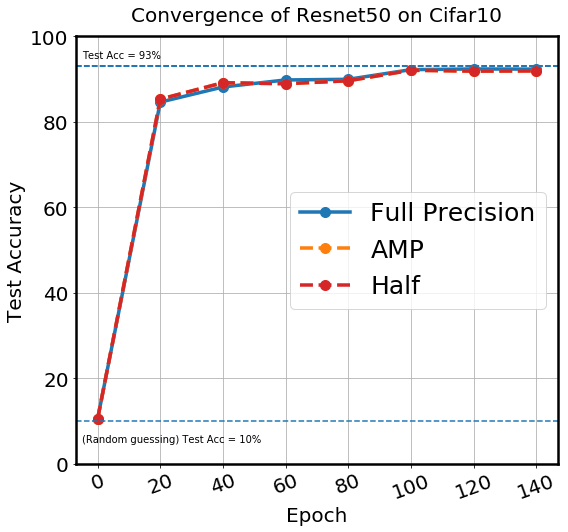

In [29]:
fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)

# tar acc
df1.plot(x='epoch', y='test_acc', linestyle='-', marker=".",
          ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
          label=r"Full Precision").axhline(y=93, linestyle="--")

df2.plot(x='epoch', y='test_acc', linestyle='--', marker=".",
          ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
          label=r"AMP").axhline(y=93, linestyle="--")

df2.plot(x='epoch', y='test_acc', linestyle='--', marker=".",
          ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
          label=r"Half").axhline(y=93, linestyle="--")

plt.axhline(y=10, linestyle="--")

ax.annotate('Test Acc = 93%', 
            xy=(0, 93), 
            xytext=(-5, 95), 
            )

ax.annotate('(Random guessing) Test Acc = 10%', 
            xy=(0, 10), 
            xytext=(-5, 5), 
            )


plt.xlabel("Epoch", size=20)
plt.ylabel("Test Accuracy", size=20)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(0, 100)
# plt.xlim(-1, 150)
legend_properties = {'size':25}
ax.xaxis.get_offset_text()
ax.xaxis.get_offset_text()
ax.legend(prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
ax.set_title('Convergence of Resnet50 on Cifar10', pad=15, size=20)
plt.grid()
plt.tight_layout()
plt.savefig("resnet50_convergence_epochs.png", format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)

<Figure size 1440x1152 with 0 Axes>

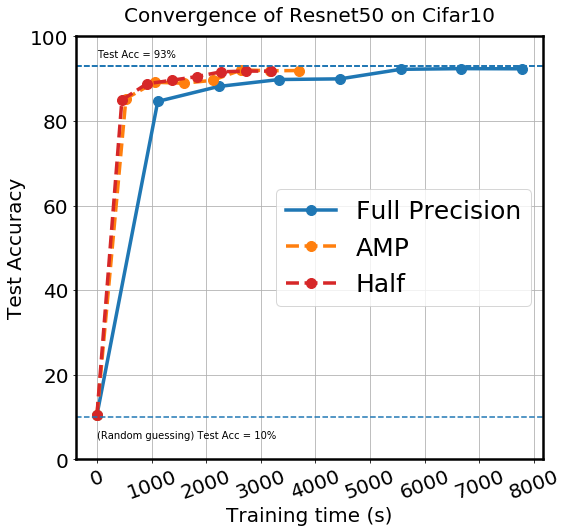

In [30]:
fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)

# tar acc
df1.plot(x='total_train_time', y='test_acc', linestyle='-', marker=".",
          ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
          label=r"Full Precision").axhline(y=93, linestyle="--")

df2.plot(x='total_train_time', y='test_acc', linestyle='--', marker=".",
          ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
          label=r"AMP").axhline(y=93, linestyle="--")

df3.plot(x='total_train_time', y='test_acc', linestyle='--', marker=".",
          ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
          label=r"Half").axhline(y=93, linestyle="--")

plt.axhline(y=10, linestyle="--")

ax.annotate('Test Acc = 93%', 
            xy=(0, 93), 
            xytext=(-5, 95), 
            )

ax.annotate('(Random guessing) Test Acc = 10%', 
            xy=(0, 10), 
            xytext=(-5, 5), 
            )


plt.xlabel("Training time (s)", size=20)
plt.ylabel("Test Accuracy", size=20)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(0, 100)
# plt.xlim(-1, 150)
legend_properties = {'size':25}
ax.xaxis.get_offset_text()
ax.xaxis.get_offset_text()
ax.legend(prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
ax.set_title('Convergence of Resnet50 on Cifar10', pad=15, size=20)
plt.grid()
plt.tight_layout()
plt.savefig("resnet50_convergence_time.png", format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)

In [31]:
df2

,Unnamed: 0,epoch,training_loss,test_acc,epoch_train_time,total_train_time,lr
0,0,0,-1.000000,10.52,-1.000000,-1.000000,-1.000
20,20,20,0.227588,85.31,26.394068,529.235557,0.100
40,40,40,0.242629,89.16,26.416134,1058.949457,0.100
60,60,60,0.068886,88.93,26.380812,1588.966140,0.100
80,80,80,0.026725,89.62,26.410472,2116.971111,0.100
100,100,100,0.000970,92.08,26.398516,2645.627660,0.010
120,120,120,0.000032,91.88,27.030018,3174.463773,0.010
140,140,140,0.000125,91.93,26.477222,3703.828506,0.001


In [32]:
df3

,Unnamed: 0,epoch,training_loss,test_acc,epoch_train_time,total_train_time,lr
0,0,0,-1.000000,10.52,-1.000000,-1.000000,-1.000
20,20,20,0.294189,84.97,22.833280,455.872905,0.100
40,40,40,0.188354,88.79,22.808167,911.979122,0.100
60,60,60,0.096558,89.63,22.814007,1367.832824,0.100
80,80,80,0.063904,90.49,22.864222,1823.774681,0.100
100,100,100,0.002354,91.64,22.730823,2279.321782,0.010
120,120,120,0.002533,91.80,22.732185,2734.743353,0.010
140,140,140,0.001302,91.79,22.798176,3190.573792,0.001


# Figure 1
"Per-epoch training time on several models atdifferent precision levels and batch sizes."

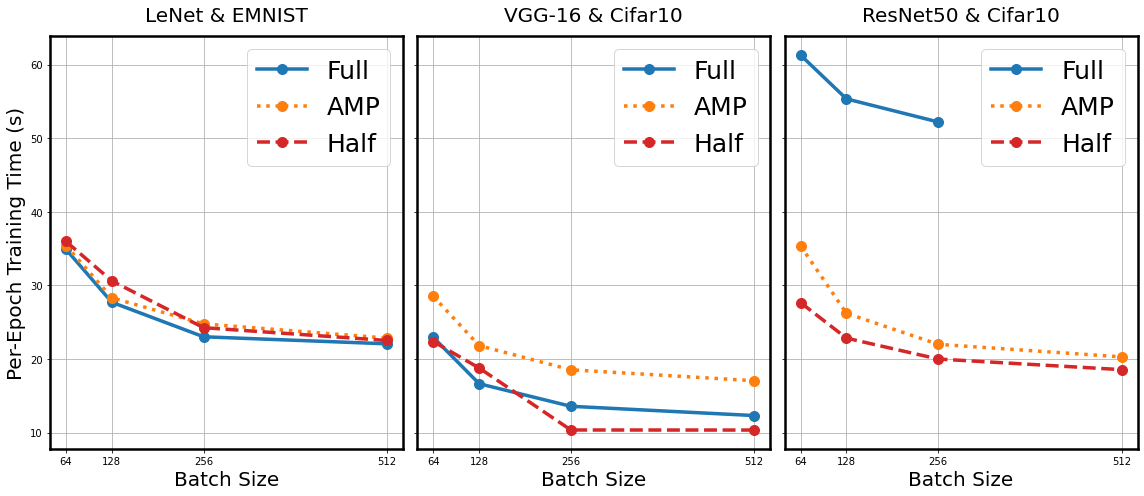

In [24]:
# input data:
files = [
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_AMP',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_Full',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_Half',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_AMP',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_Full',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_Half',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_AMP',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_Full',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_Half',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_AMP',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_Full',
        'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_Half',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_AMP',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Full',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Half',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_AMP',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_Full',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_Half',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize512_AMP',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize512_Half',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_AMP',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_Full',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_Half',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_AMP',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_Full',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_Half',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_AMP',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_Full',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_Half',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_AMP',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_Full',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_Half',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_AMP',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_Full',
        'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_Half'
]

# data processing:
data = []
data.append(['model', 'dataset', 'batch_size', 'precision', 'avg_epoch_train_time'])
for file in files:
  tmp = file.replace('output/v100_fullmodel/results_' ,'')
  tmp = tmp.split('_')
  model = tmp[0]
  dataset = tmp[1]
  batch_size = int(tmp[2].replace('batchsize',''))
  precision = tmp[3]
  df=pd.read_csv(file, sep=',',header=0)
  df = df.iloc[1:] # delete the first (re-training) row (epoch 0)
  avg_train_time = df['epoch_train_time'].mean()
  data.append([model, dataset, batch_size, precision, avg_train_time])

# plot construction:
df = pd.DataFrame(data[1:],columns=data[0])
orders = ['Full', 'AMP', 'Half']
df_lenet = df[(df['model']=="lenet") & (df['dataset']=="EMNIST")]
df_lenet = df_lenet.pivot(index='batch_size', columns='precision', values='avg_epoch_train_time')
df_lenet = df_lenet[orders]
df_vgg16 = df[(df['model']=="vgg16") & (df['dataset']=="Cifar10")]
df_vgg16 = df_vgg16.pivot(index='batch_size', columns='precision', values='avg_epoch_train_time')
df_vgg16 = df_vgg16[orders]
df_resnet = df[(df['model']=="resnet50") & (df['dataset']=="Cifar10")]
df_resnet = df_resnet.pivot(index='batch_size', columns='precision', values='avg_epoch_train_time')
df_resnet = df_resnet[orders]

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(16,7))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
styles = ['-',':','--']
colors = ['C0', 'C1', 'C3']
df_lenet.plot(ax=axes[0], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=20, markevery=1)
df_vgg16.plot(ax=axes[1], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=20, markevery=1)
df_resnet.plot(ax=axes[2], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=20, markevery=1)
plt.xticks([64,128,256,512])
axes[0].set_title('LeNet & EMNIST', pad=15, size=20)
axes[1].set_title('VGG-16 & Cifar10', pad=15, size=20)
axes[2].set_title('ResNet50 & Cifar10', pad=15, size=20)
axes[0].set_xlabel("Batch Size", size=20)
axes[1].set_xlabel("Batch Size", size=20)
axes[2].set_xlabel("Batch Size", size=20)
legend_properties = {'size':25}
axes[0].legend(prop=legend_properties)
axes[1].legend(prop=legend_properties)
axes[2].legend(prop=legend_properties)
axes[0].set_ylabel("Per-Epoch Training Time (s)", size=20)
plt.tight_layout()
plt.show()

# Figure 2
"Per-epoch training time of RESNET-50 on dif-ferent GPU architectures."

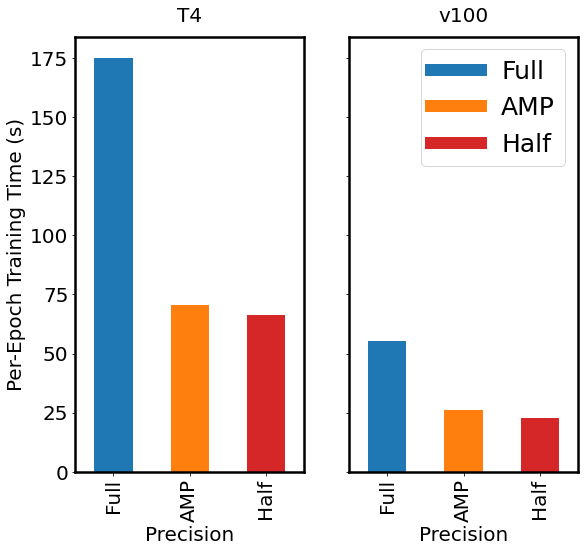

In [33]:
# input data:
files = [
        'output/T4_fullmodel/results_resnet50_Cifar10_batchsize128_AMP',
        'output/T4_fullmodel/results_resnet50_Cifar10_batchsize128_Full',
        'output/T4_fullmodel/results_resnet50_Cifar10_batchsize128_Half',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_AMP',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Full',
        'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Half',
]

# data processing:
data = []
data.append(['gpu', 'precision', 'avg_epoch_train_time'])
for file in files:
  gpu = 'T4'
  if 'v100' in file:
    gpu = 'v100'
  tmp = file.replace('output/v100_fullmodel/results_' ,'').replace('output/T4_fullmodel/results_' ,'')
  tmp = tmp.split('_')
  model = tmp[0]
  dataset = tmp[1]
  batch_size = int(tmp[2].replace('batchsize',''))
  precision = tmp[3]
  df=pd.read_csv(file, sep=',',header=0)
  df = df.iloc[1:] # delete the first (re-training) row (epoch 0)
  avg_train_time = df['epoch_train_time'].mean()
  data.append([gpu, precision, avg_train_time])

# plot construction:
df = pd.DataFrame(data[1:],columns=data[0])
cat_precision_order = CategoricalDtype(['Full', 'AMP', 'Half'], ordered=True)
df['precision'] = df['precision'].astype(cat_precision_order)
df = df.sort_values('precision')
df_resnet_T4 = df[(df['gpu']=="T4")]
df_resnet_v100 = df[(df['gpu']=="v100")]
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(9,8))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
colors = ['C0', 'C1', 'C3']
df_resnet_T4.plot(ax=axes[0], x='precision', y='avg_epoch_train_time', kind='bar', color=colors)
df_resnet_v100.plot(ax=axes[1], x='precision', y='avg_epoch_train_time', kind='bar', color=colors)
axes[0].set_title('T4', pad=15, size=20)
axes[1].set_title('v100', pad=15, size=20)
axes[0].set_xlabel("Precision", size=20)
axes[0].get_legend().remove()
axes[1].set_xlabel("Precision", size=20)
axes[1].get_legend().remove()
axes[0].set_ylabel("Per-Epoch Training Time (s)", size=20)
legend_properties = {'size':25}
custom_legend = [Line2D([0], [0], color='C0', lw=12),
                Line2D([0], [0], color='C1', lw=12),
                Line2D([0], [0], color='C3', lw=12)]
axes[1].legend(custom_legend, ['Full', 'AMP', 'Half'], prop=legend_properties)
plt.show()

# Figures 3 & 4
"Accuracy by epoch at different precision levels"
"Accuracy by total training time at different pre-cision levels"

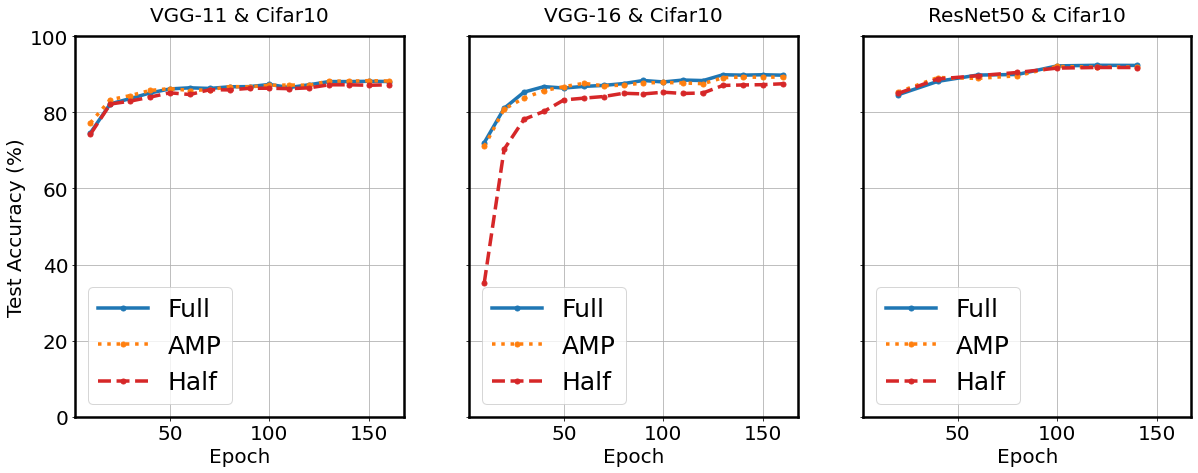

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-32-723b39ef2c9f>:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_vgg11[(df['precision']==key)].plot(ax=axes[0], kind='line', x='total_train_time', y='test_acc', label=key, style=style, color=color, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
<ipython-input-32-723b39ef2c9f>:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_vgg11[(df['precision']==key)].plot(ax=axes[0], kind='line', x='total_train_time', y='test_acc', label=key, style=style, color=color, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
<ipython-input-32-723b39ef2c9f>:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_vgg11[(df['precision']==key)].plot(ax=axes[0], kind='line', x='total_train_time', y='test_acc',

<Figure size 432x288 with 0 Axes>

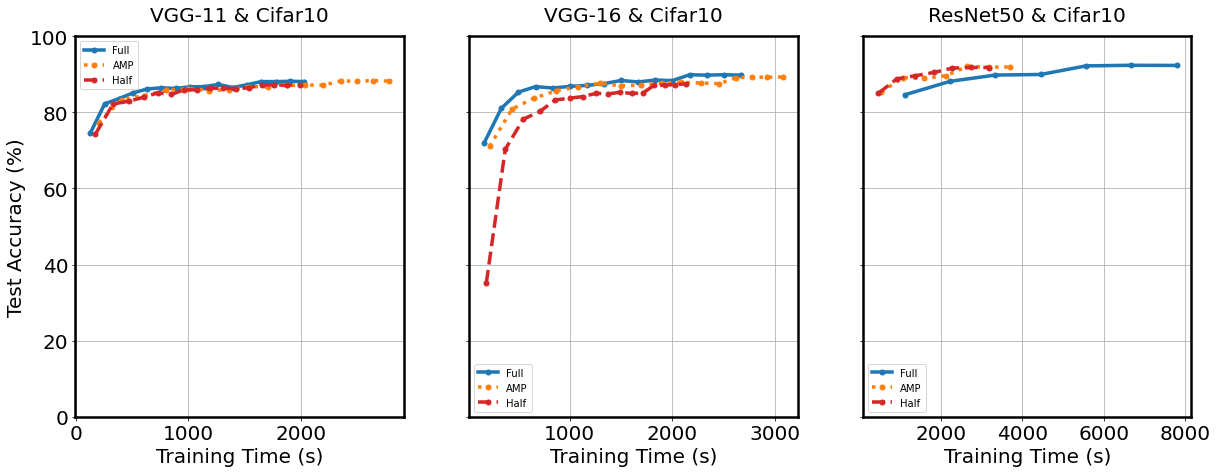

In [32]:
# input data:
files = [
        'output/v100_fullmodel_2/results_vgg11_Cifar10_batchsize128_Full.csv',
        'output/v100_fullmodel_2/results_vgg11_Cifar10_batchsize128_AMP.csv',
        'output/v100_fullmodel_2/results_vgg11_Cifar10_batchsize128_Half.csv',
        'output/v100_fullmodel_2/results_vgg16_Cifar10_batchsize128_Full.csv',
        'output/v100_fullmodel_2/results_vgg16_Cifar10_batchsize128_AMP.csv',
        'output/v100_fullmodel_2/results_vgg16_Cifar10_batchsize128_Half_fixed.csv',
        'output/v100_convergence/results_resnet50_Cifar10_batchsize128_Full.csv',
        'output/v100_convergence/results_resnet50_Cifar10_batchsize128_AMP.csv',
        'output/v100_convergence/results_resnet50_Cifar10_batchsize128_Half.csv'
]

# data processing:
data = []
data.append(['model', 'dataset', 'precision', 'epoch', 'training_loss', 'test_acc', 'epoch_train_time', 'total_train_time'])
for file in files:
  tmp = file.replace('output/v100_fullmodel_2/results_' ,'').replace('output/v100_convergence/results_' ,'').replace('_fixed.csv','').replace('.csv','')
  tmp = tmp.split('_')
  model = tmp[0]
  dataset = tmp[1]
  batch_size = int(tmp[2].replace('batchsize',''))
  precision = tmp[3]
  df=pd.read_csv(file, sep=',',header=0)
  df = df.iloc[1:] # delete the first (re-training) row (epoch 0)
  for i, row in df.iterrows():
    epoch = int(row[1])
    training_loss = float(row[2])
    test_acc = float(row[3])
    epoch_train_time = float(row[4])
    total_train_time = float(row[5])
    data.append([model, dataset, precision, epoch, training_loss, test_acc, epoch_train_time, total_train_time])

# plot construction (Figure 3):
df = pd.DataFrame(data[1:],columns=data[0])
orders = ['Full', 'AMP', 'Half']
styles = ['-',':','--']
df_vgg11 = df[(df['model']=="vgg11") & (df['dataset']=="Cifar10") & (df['test_acc']!=-1)]
df_vgg11 = df_vgg11.pivot(index='epoch', columns='precision', values='test_acc')
df_vgg11 = df_vgg11[orders]
df_vgg16 = df[(df['model']=="vgg16") & (df['dataset']=="Cifar10") & (df['test_acc']!=-1)]
df_vgg16 = df_vgg16.pivot(index='epoch', columns='precision', values='test_acc')
df_vgg16 = df_vgg16[orders]
df_resnet50 = df[(df['model']=="resnet50") & (df['dataset']=="Cifar10") & (df['test_acc']!=-1)]
df_resnet50 = df_resnet50.pivot(index='epoch', columns='precision', values='test_acc')
df_resnet50 = df_resnet50[orders]
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20,7))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
colors = ['C0', 'C1', 'C3']
df_vgg11.plot(ax=axes[0], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
df_vgg16.plot(ax=axes[1], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
df_resnet50.plot(ax=axes[2], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
legend_properties = {'size':25}
axes[0].legend(prop=legend_properties)
axes[1].legend(prop=legend_properties)
axes[2].legend(prop=legend_properties)
axes[0].set_title('VGG-11 & Cifar10', pad=15, size=20)
axes[1].set_title('VGG-16 & Cifar10', pad=15, size=20)
axes[2].set_title('ResNet50 & Cifar10', pad=15, size=20)
axes[0].set_xlabel("Epoch", size=20)
axes[1].set_xlabel("Epoch", size=20)
axes[2].set_xlabel("Epoch", size=20)
axes[0].set_ylabel("Test Accuracy (%)", size=20)
plt.ylim(0, 100)
plt.show()

# plot construction (Figure 4):
plt.clf()
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(20,7))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
legend_properties = {'size':25}
axes[0].legend(prop=legend_properties)
axes[1].legend(prop=legend_properties)
axes[2].legend(prop=legend_properties)
df_vgg11 = df[(df['model']=="vgg11") & (df['dataset']=="Cifar10") & (df['test_acc']!=-1)]
labels = ['Full', 'AMP', 'Half']
for key in labels:
  if key=='Full':
    color = 'C0'
    style = '-'
  elif key=='AMP':
    color = 'C1'
    style = ':'
  else:
    color = 'C3'
    style = '--'
  ax = df_vgg11[(df['precision']==key)].plot(ax=axes[0], kind='line', x='total_train_time', y='test_acc', label=key, style=style, color=color, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
axes[0].set_title('VGG-11 & Cifar10', pad=15, size=20)
axes[0].set_xlabel("Training Time (s)", size=20)
axes[0].set_ylabel("Test Accuracy (%)", size=20)
df_vgg16 = df[(df['model']=="vgg16") & (df['dataset']=="Cifar10") & (df['test_acc']!=-1)]
for key in labels:
  if key=='Full':
    color = 'C0'
    style = '-'
  elif key=='AMP':
    color = 'C1'
    style = ':'
  else:
    color = 'C3'
    style = '--'
  ax = df_vgg16[(df['precision']==key)].plot(ax=axes[1], kind='line', x='total_train_time', y='test_acc', label=key, style=style, color=color, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
axes[1].set_title('VGG-16 & Cifar10', pad=15, size=20)
axes[1].set_xlabel("Training Time (s)", size=20)

df_resnet50 = df[(df['model']=="resnet50") & (df['dataset']=="Cifar10") & (df['test_acc']!=-1)]
for key in labels:
  if key=='Full':
    color = 'C0'
    style = '-'
  elif key=='AMP':
    color = 'C1'
    style = ':'
  else:
    color = 'C3'
    style = '--'
  ax = df_resnet50[(df['precision']==key)].plot(ax=axes[2], kind='line', x='total_train_time', y='test_acc', label=key, style=style, color=color, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
axes[2].set_title('ResNet50 & Cifar10', pad=15, size=20)
axes[2].set_xlabel("Training Time (s)", size=20)

plt.ylim(0, 100)
plt.show()

# Figure 6
"Test accuracy by epoch for Half/AMP/Full with EB tickets (VVG11, VGG16, PreResNet)"

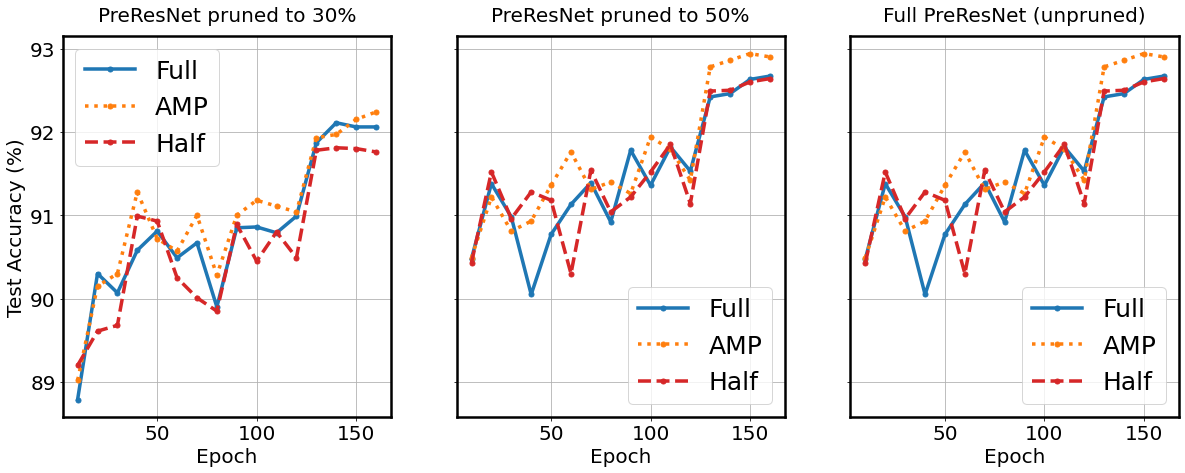

In [5]:
# input data:
files = [
        'output/preresnet101_eb_convergence/results_preresnet_Cifar10_batchsize256_AMP_eb30.csv',
        'output/preresnet101_eb_convergence/results_preresnet_Cifar10_batchsize256_AMP_eb50.csv',
        'output/preresnet101_eb_convergence/results_preresnet_Cifar10_batchsize256_Full_eb30.csv',
        'output/preresnet101_eb_convergence/results_preresnet_Cifar10_batchsize256_Full_eb50.csv',
        'output/preresnet101_eb_convergence/results_preresnet_Cifar10_batchsize256_Half_eb30.csv',
        'output/preresnet101_eb_convergence/results_preresnet_Cifar10_batchsize256_Half_eb50.csv',
        'output/v100_fullmodel_2/results_preresnet_Cifar10_batchsize256_AMP.csv',
        'output/v100_fullmodel_2/results_preresnet_Cifar10_batchsize256_Full.csv',
        'output/v100_fullmodel_2/results_preresnet_Cifar10_batchsize256_Half.csv'
]

# data processing:
data = []
data.append(['model', 'dataset', 'precision', 'prune', 'epoch', 'training_loss', 'test_acc', 'epoch_train_time', 'total_train_time'])
for file in files:
  tmp = file.replace('output/preresnet101_eb_convergence/results_' ,'').replace('output/v100_fullmodel_2/results_' ,'').replace('.csv','')
  tmp = tmp.split('_')
  model = tmp[0]
  dataset = tmp[1]
  batch_size = int(tmp[2].replace('batchsize',''))
  precision = tmp[3]
  if len(tmp)>4:
    prune = tmp[4].replace('eb','')
  else:
    prune = 'full'
  df=pd.read_csv(file, sep=',',header=0)
  df = df.iloc[1:] # delete the first (re-training) row (epoch 0)
  for i, row in df.iterrows():
    epoch = int(row[1])
    training_loss = float(row[2])
    test_acc = float(row[3])
    epoch_train_time = float(row[4])
    total_train_time = float(row[5])
    data.append([model, dataset, precision, prune, epoch, training_loss, test_acc, epoch_train_time, total_train_time])

# plot construction (Figure 3):
df = pd.DataFrame(data[1:],columns=data[0])
orders = ['Full', 'AMP', 'Half']
styles = ['-',':','--']
df_30 = df[(df['prune']=="30") & (df['test_acc']!=-1)]
df_30 = df_30.pivot(index='epoch', columns='precision', values='test_acc')
df_30 = df_30[orders]
df_50 = df[(df['prune']=="50") & (df['test_acc']!=-1)]
df_50 = df_50.pivot(index='epoch', columns='precision', values='test_acc')
df_50 = df_50[orders]
df_100 = df[(df['prune']=="50") & (df['test_acc']!=-1)]
df_100 = df_100.pivot(index='epoch', columns='precision', values='test_acc')
df_100 = df_100[orders]
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20,7))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
colors = ['C0', 'C1', 'C3']
df_30.plot(ax=axes[0], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
df_50.plot(ax=axes[1], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
df_100.plot(ax=axes[2], style=styles, color=colors, grid=True, marker=".", linewidth=3.5, markersize=10, markevery=1)
legend_properties = {'size':25}
axes[0].legend(prop=legend_properties)
axes[1].legend(prop=legend_properties)
axes[2].legend(prop=legend_properties)
axes[0].set_title('PreResNet pruned to 30%', pad=15, size=20)
axes[1].set_title('PreResNet pruned to 50%', pad=15, size=20)
axes[2].set_title('Full PreResNet (unpruned)', pad=15, size=20)
axes[0].set_xlabel("Epoch", size=20)
axes[1].set_xlabel("Epoch", size=20)
axes[2].set_xlabel("Epoch", size=20)
axes[0].set_ylabel("Test Accuracy (%)", size=20)
#plt.ylim(0, 100)
plt.show()